We first import the necessary libraries.  

In [2]:
# Prepares iPython notebook for working with matplotlib
%matplotlib inline 

import numpy as np # imports a fast numerical programming library
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes

#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns #sets up styles and gives us more plotting options

## Part 2: Introduction to Numpy
Scientific Python code uses a fast array structure, called the numpy array. Those who have worked in Matlab will find this very natural.   For reference, the numpy documention can be found [here](https://docs.scipy.org/doc/numpy/reference/).  

Let's make a numpy array.

This is like a "row" of a matrix

In [23]:
my_array = np.array([1, 2, 3, 4])
my_array 

array([1, 2, 3, 4])

Numpy arrays are listy! Below we compute length, slice, and iterate. 

This way is like a "column" of a matrix. Depending on the library used it might expect a "column" or a "row". We'll see this when doing regression

In [25]:
my_array.reshape(-1,1)

array([[1],
       [2],
       [3],
       [4]])

In [26]:
print(len(my_array))
print(my_array[2:4])
for ele in my_array:
    print(ele)

4
[3 4]
1
2
3
4


#### Numpy supports vector operations

What does this mean? It means that instead of adding two arrays, element by element, you can just say: add the two arrays. Note that this behavior is very different from python lists.

Remember the two arrays must have the same shape to add element wise

In [68]:
first = np.ones((5))
second = np.ones((5))
first + second

array([2., 2., 2., 2., 2.])

In [69]:
first_list = [1., 1., 1., 1., 1.]
second_list = [1., 1., 1., 1., 1.]
first_list + second_list #not what u want

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

On some computer chips this addition actually happens in parallel, so speedups can be high. But even on regular chips, the advantage of greater readability is important.

### Numpy Arrays vs. Python Lists?

1. Why the need for numpy arrays?  Can't we just use Python lists?
2. Iterating over numpy arrays is slow. Slicing is faster

Python lists may contain items of different types. This flexibility comes at a price: Python lists store *pointers* to memory locations.  On the other hand, numpy arrays are typed, where the default type is floating point.  Because of this, the system knows how much memory to allocate, and if you ask for an array of size 100, it will allocate one hundred contiguous spots in memory, where the size of each spot is based on the type.  This makes access extremely fast.

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/array_vs_list.png" alt="Drawing" style="width: 500px;"/>

(from the book below)

BUT, iteration slows things down again. In general you should not access numpy array elements by iteration.  This is because of type conversion.  Numpy stores integers and floating points in C-language format.  When you operate on array elements through iteration, Python needs to convert that element to a Python int or float, which is a more complex beast (a `struct` in C jargon).  This has a cost.

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/cint_vs_pyint.png" alt="Drawing" style="width: 500px;"/>

(from the book below)

If you want to know more, we will suggest that you read this from [Jake Vanderplas's Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/). You will find that book an incredible resource for this class.

Why is slicing faster? The reason is technical: slicing provides a view onto the memory occupied by a numpy array, instead of creating a new array. That is the reason the code above this cell works nicely as well. However, if you iterate over a slice, then you have gone back to the slow access.

By contrast, functions such as `np.dot` are implemented at C-level, do not do this type conversion, and access contiguous memory. If you want this kind of access in Python, use the struct module or Cython. Indeed many fast algorithms in numpy, pandas, and C are either implemented at the C-level, or employ Cython.

## Part 3:  Introduction to Pandas 

Often data is stored in comma separated values (CSV) files.    For the remainder of this lab, we'll be working with [automobile data](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html), where we've extracted relevant parts below.

Note that CSV files can be output by any spreadsheet software, and are plain text, hence are a great way to share data. 

### Importing data with numpy
Below we'll read in automobile data from a CSV file, storing the data in Python's memory first as a numpy array.  

````` 
Description
The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and ten aspects of automobile design and performance for 32 automobiles (1973–74 models).

Format

A data frame with 32 observations on 11 variables.

[, 1]	mpg	     Miles/(US) gallon
[, 2]	cyl	     Number of cylinders
[, 3]	disp	 Displacement (cu.in.)
[, 4]	hp	     Gross horsepower
[, 5]	drat	 Rear axle ratio
[, 6]	wt	     Weight (1000 lbs)
[, 7]	qsec	 1/4 mile time
[, 8]	vs	     V/S
[, 9]	am	     Transmission (0 = automatic, 1 = manual)
[,10]	gear	 Number of forward gears
[,11]	carb	 Number of carburetors
        
Source
Henderson and Velleman (1981), Building multiple regression models interactively. Biometrics, 37, 391–411.
`````

>EXERCISE: `genfromtxt` is a numpy function that can be used to load text data.  Write code that loads the data into a two-dimensional array called `arrcars`, prints out the shape and the first two rows of of `arrcars`.

In [120]:
# your code here
arrcars = np.genfromtxt('data/mtcars.csv', delimiter=',', skip_, usecols=(1,2,3,4,5,6,7,8,9,10,11))

In [121]:
print(arrcars.shape)
print(arrcars[:2])

(32, 11)
[[ 21.      6.    160.    110.      3.9     2.62   16.46    0.      1.
    4.      4.   ]
 [ 21.      6.    160.    110.      3.9     2.875  17.02    0.      1.
    4.      4.   ]]


You will see that reading the data into a numpy array is entirely clumsy.  


We'd like a data structure that can represent the columns in the data above by their name. In particular, we want a structure that can easily store variables of different types, that stores column names, and that we can reference by column name as well as by indexed position.  And it would be nice this data structure came with built-in functions that we can use to manipulate it. 

Pandas is a package/library that does all of this!  The library is built on top of numpy.  There are two basic pandas objects, *series* and *dataframes*, which can be thought of as enhanced versions of 1D and 2D numpy arrays, respectively.  Indeed Pandas attempts to keep all the efficiencies that `numpy` gives us.

For reference, here is a useful pandas [cheat sheet](https://drive.google.com/folderview?id=0ByIrJAE4KMTtaGhRcXkxNHhmY2M&usp=sharing) and the pandas [documentation](https://pandas.pydata.org/pandas-docs/stable/).

### Importing data with pandas

Now let's read in our automobile data as a pandas *dataframe* structure.  

In [5]:
# Read in the csv files
dfcars=pd.read_csv("mtcars.csv")
type(dfcars)

pandas.core.frame.DataFrame

In [6]:
dfcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Wow!  That was easier and the output is nicer.  What we have now is a spreadsheet with indexed rows and named columns, called a *dataframe* in pandas.  `dfcars` is an *instance* of the pd.DataFrame *class*, created by calling the pd.read_csv "constructor function".

The take-away is that `dfcars` is a dataframe object, and it has methods (functions) belonging to it. For example, `df.head()` is a method that shows the first 5 rows of the dataframe.

A pandas dataframe is a set of columns pasted together into a spreadsheet, as shown in the schematic below, which is taken from the cheatsheet above.  The columns in pandas are called *series* objects.

![](images/pandastruct.png)

Let's look again at the first five rows of `dfcars`.  

In [7]:
dfcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Notice the poorly named first column: "Unnamed: 0". Why did that happen?

The first column, which seems to be the name of the car, does not have a name. Here are the first 3 lines of the file:

```    
"","mpg","cyl","disp","hp","drat","wt","qsec","vs","am","gear","carb"
"Mazda RX4",21,6,160,110,3.9,2.62,16.46,0,1,4,4
"Mazda RX4 Wag",21,6,160,110,3.9,2.875,17.02,0,1,4,4
```

Lets **clean** that up: 

We could modify the original CSV file and add a name to that column, but better practise is to **not** modify the raw data and transform anything we need through code.

In [8]:
dfcars.rename(columns={"Unnamed: 0": "name"})
dfcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Why does the above not rename the column? This is talked about below in Aside: Pandas and memory but in short, you almost always keep creating new dataframes by reusing the original variable name. It might use more memory but it lessens mistakes

In [9]:
dfcars = dfcars.rename(columns={"Unnamed: 0": "name"})
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In the above, the argument `columns = {"Unnamed: 0": "name"}` of `rename` changed the name of the first column in the dataframe from `Unnamed: 0` to `name`. 

To access a *series* (column), you can use either dictionary syntax or instance-variable syntax.

In [10]:
dfcars.mpg

0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64

In [11]:
dfcars["mpg"]

0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64

You can get a numpy array of values from the Pandas Series: the above notice has the labels/indexes with the rest. Sometimes we just want a numpy array of values

In [12]:
dfcars.mpg.values

array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
       16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
       15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4])

And we can produce a histogram from these values

In [13]:
#documentation for plt.hist
?plt.hist

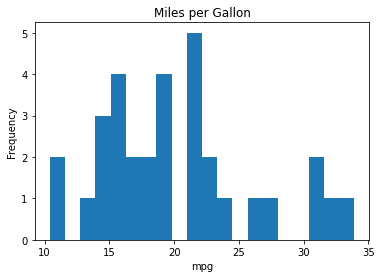

In [17]:
plt.hist(dfcars.mpg.values, bins=20);
plt.xlabel("mpg");
plt.ylabel("Frequency")
plt.title("Miles per Gallon");

But pandas is very cool: you can get a histogram directly: Notice we still "modify" the plot by accessing plt directly. (import matplotlib.pyplot as plt) from earlier.

It's a reason we almost always import matplotlib when using pandas

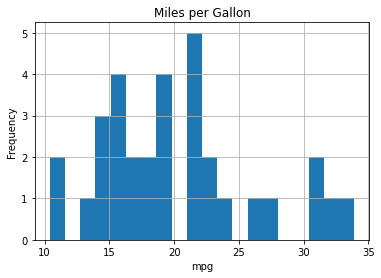

In [144]:
dfcars.mpg.hist(bins=20);
plt.xlabel("mpg");
plt.ylabel("Frequency")
plt.title("Miles per Gallon");

Pandas supports a dictionary like access to columns. This is very useful when column names have spaces: Python variables cannot have spaces in them.

In [65]:
dfcars['mpg']


We can also get sub-dataframes by choosing a set of series. We  pass a list of the columns we want as "dictionary keys" to the dataframe.  

In [145]:
dfcars[['am', 'mpg']]

,am,mpg
0,1,21.0
1,1,21.0
2,1,22.8
3,0,21.4
4,0,18.7
5,0,18.1
6,0,14.3
7,0,24.4
8,0,22.8
9,0,19.2


More complex indexing is also possible, using listiness.

Joining dataframes together is possible

### Dataframes and Series

Now that we have our automobile data loaded as a dataframe, we'd like to be able to manipulate it, its series, and its sub-dataframes, say by calculating statistics and plotting distributions of features.  Like arrays and other containers, dataframes and series are listy, so we can apply the list operations we already know to these new containers.  Below we explore our dataframe and its properties, in the context of listiness.

#### Listiness property 1: set length

 The attribute `shape` tells us the dimension of the dataframe, the number of rows and columns in the dataframe, `(rows, columns)`.  Somewhat strangely, but fairly usefully, (which is why the developers of Pandas probably did it ) the `len` function outputs the number of rows in the dataframe, not the number of columns as we'd expect based on how dataframes are built up from pandas series (columns).  

In [146]:
print(dfcars.shape)     # 12 columns, each of length 32
print(len(dfcars))      # the number of rows in the dataframe, also the length of a series
print(len(dfcars.mpg))  # the length of a series

(32, 12)
32
32


#### Listiness property 2: iteration via loops

 One consequence of the column-wise construction of dataframes is that you cannot easily iterate over the rows of the dataframe.  Instead, we iterate over the columns, for example, by printing out the column names via a for loop.  

In [147]:
for ele in dfcars: # iterating iterates over column names though, like a dictionary
    print(ele)

name
mpg
cyl
disp
hp
drat
wt
qsec
vs
am
gear
carb


Or we can call the attribute `columns`.  Notice the `Index` in the output below. We'll return to this shortly. 

In [148]:
dfcars.columns

Index(['name', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')

We can iterate series in the same way that we iterate lists. Here we print out the number of cylinders for each of the 32 vehicles. 

BUT for the same reason as not iterating over numpy arrays, DON'T DO THIS.

In [152]:
print(dfcars.cyl.values)

[6 6 4 6 8 6 8 4 4 6 6 8 8 8 8 8 8 4 4 4 4 8 8 8 8 4 4 4 8 6 8 4]


In [149]:
for ele in dfcars.cyl:
    print(ele)

6
6
4
6
8
6
8
4
4
6
6
8
8
8
8
8
8
4
4
4
4
8
8
8
8
4
4
4
8
6
8
4


How do you iterate over rows?  Dataframes are put together column-by-column and you should be able to write code which never requires iteration over loops. But if you still find a need to iterate over rows, you can do it using `itertuples`.  See the documentation.  

**In general direct iteration through pandas series/dataframes (and numpy arrays) is a bad idea**, because of the reasons in the earlier "Python Lists vs. Numpy Arrays" section. 

Instead, you should manipulate dataframes and series with pandas methods which are written to be very fast (ie, they access series and dataframes at the C level). Similarly numpy arrays should be accessed directly through numpy methods.

#### Listiness property 3: slice

Let's see how indexing works in dataframes.  Like lists in Python and arrays in numpy, dataframes and series are zero-indexed.

In [153]:
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [154]:
# index for the dataframe
print(list(dfcars.index))
# index for the cyl series
dfcars.cyl.index

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


RangeIndex(start=0, stop=32, step=1)

There are two ways to index dataframes. The `loc` property indexes by label name, while `iloc` indexes by position in the index.  We'll illustrate this with a slightly modified version of `dfcars`, created by relabeling the row indices of `dfcars` to start at 5 instead of 0.  

In [155]:
# create values from 5 to 36
new_index = np.arange(5, 37)
# new dataframe with indexed rows from 5 to 36
dfcars_reindex = dfcars.reindex(new_index)
dfcars_reindex.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
5,Valiant,18.1,6.0,225.0,105.0,2.76,3.46,20.22,1.0,0.0,3.0,1.0
6,Duster 360,14.3,8.0,360.0,245.0,3.21,3.57,15.84,0.0,0.0,3.0,4.0
7,Merc 240D,24.4,4.0,146.7,62.0,3.69,3.19,20.00,1.0,0.0,4.0,2.0
8,Merc 230,22.8,4.0,140.8,95.0,3.92,3.15,22.90,1.0,0.0,4.0,2.0
9,Merc 280,19.2,6.0,167.6,123.0,3.92,3.44,18.30,1.0,0.0,4.0,4.0


We now return the first three rows of `dfcars_reindex` in two different ways, first with `iloc` and then with `loc`.  With `iloc` we use the command

In [156]:
dfcars_reindex.iloc[0:3]

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
5,Valiant,18.1,6.0,225.0,105.0,2.76,3.46,20.22,1.0,0.0,3.0,1.0
6,Duster 360,14.3,8.0,360.0,245.0,3.21,3.57,15.84,0.0,0.0,3.0,4.0
7,Merc 240D,24.4,4.0,146.7,62.0,3.69,3.19,20.00,1.0,0.0,4.0,2.0


since `iloc` uses the position in the index.  Notice that the argument 0:3 with `iloc` returns the first three rows of the dataframe, which have label names 5, 6, and 7.  To access the same rows with `loc`, we write

In [157]:
dfcars_reindex.loc[0:7] # or dfcars_reindex.loc[5:7]

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
5,Valiant,18.1,6.0,225.0,105.0,2.76,3.46,20.22,1.0,0.0,3.0,1.0
6,Duster 360,14.3,8.0,360.0,245.0,3.21,3.57,15.84,0.0,0.0,3.0,4.0
7,Merc 240D,24.4,4.0,146.7,62.0,3.69,3.19,20.00,1.0,0.0,4.0,2.0


since `loc` indexes via the label name.  

Here's another example where we return three rows of `dfcars_reindex` that correspond to column attributes `mpg`, `cyl`, and `disp`.  First do it with `iloc`:

In [158]:
dfcars_reindex.iloc[2:5, 1:4]

,mpg,cyl,disp
7,24.4,4.0,146.7
8,22.8,4.0,140.8
9,19.2,6.0,167.6


Notice that rows we're accessing, 2, 3, and 4, have label names 7, 8, and 9, and the columns we're accessing, 1, 2, and 3, have label names `mpg`, `cyl`, and `disp`.  So for both rows and columns, we're accessing elements of the dataframe using the integer position indices.  Now let's do it with `loc`:

In [159]:
dfcars_reindex.loc[7:9, ['mpg', 'cyl', 'disp']]

,mpg,cyl,disp
7,24.4,4.0,146.7
8,22.8,4.0,140.8
9,19.2,6.0,167.6


We don't have to remember that `disp` is the third column of the dataframe the way we did when the data was stored as a numpy array -- we can simply access it with `loc` using the label name `disp`. 

Generally we prefer `iloc` for indexing rows and `loc` for indexing columns. 

>**EXERCISE**: In this exercise you'll examine the documentation to generate a toy dataframe from scratch.  Go to the documentation and click on "10 minutes to pandas" in the table of contents.  Then do the following:

>1.  Create a series called `column_1` with entries 0, 1, 2, 3.

>2.  Create a second series called `column_2` with entries 4, 5, 6, 7.

>3.  Glue these series into a dataframe called `table`, where the first and second labelled column of the dataframe are `column_1` and `column_2`, respectively.  In the dataframe, `column_1` should be indexed as `col_1` and `column_2` should be indexed as `col_2`.

> Oops!  You've changed your mind about the index labels for the columns.  Use `rename` to rename `col_1` as `Col_1` and `col_2` as `Col_2`.  

> *Stretch*: Can you figure out how to rename the row indexes?  Try to rename `0` as `zero`, `1` as `one`, and so on.


In [165]:
column_2

0    4
1    5
2    6
3    7
dtype: int64

In [173]:
# your code here
column_1 = pd.Series(range(4)) # or pd.Series([0,1,2,3])
column_2 = pd.Series(range(4,8))
table = pd.DataFrame({'col_1': column_1 , 'col_2':column_2}) 
table = table.rename(columns={'col_1': 'Col_1', "col_2" : "Col_2"})
table = table.rename({0:"zero", 1:"one", 2:"two", 3:"three"})

In [174]:
table

,Col_1,Col_2
zero,0,4
one,1,5
two,2,6
three,3,7


Picking rows is an idiom you probably wont use very often: there are better ways to do this which we will explore in lecture, such as grouping and querying. Picking columns can often be done by passing a list as a dictionary key.

The place where `loc` and `iloc` are very useful are where you want to change particular rows. We'll see examples of this in lecture.

### Data Types

Columns in a dataframe (series) come with their own types. Some data may be categorical, that is, they come  with only few well defined values. An example is cylinders  (`cyl`). Cars may be 4, 6, or 8 cylindered. There is a ordered interpretation to this  (8 cylinders more powerful engine than 6 cylinders) but also a one-of-three-types interpretation to this. 

Sometimes categorical data does not have an ordered interpretation. An example is `am`: a boolean variable which indicates whether the car is an automatic or not.

Other column types are integer, floating-point, and `object`. The latter is a catch-all for a string or anything Pandas cannot infer, for example, a column that contains data of mixed types. 
 
Let's see the types of the columns:

In [175]:
dfcars.dtypes

name     object
mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

As we'll see in lab 2, the `dtypes` attribute is useful for debugging.  If one of these columns is not the type you expect, it can point to missing or malformed values that you should investigate further. Pandas assigns these types by inspection of some of the values,  and if the types are missed it will make assign it as an `object`, like the `name` column. Consider for example:

In [176]:
diff_values = ['a', 1, 2, 3]
diff_series = pd.Series(diff_values)
print(diff_series)
diff_series.dtypes # object because type inference fails

0    a
1    1
2    2
3    3
dtype: object


dtype('O')

In [177]:
diff_series.values # you destroyed performance, numpy starts to act like a python list

array(['a', 1, 2, 3], dtype=object)

In [178]:
same_values = [2, 3, 4]
same_series = pd.Series(same_values)
print(same_series)
same_series.dtypes # correctly infers ints

0    2
1    3
2    4
dtype: int64


dtype('int64')

In [179]:
same_series.head()

0    2
1    3
2    4
dtype: int64

### *Aside: Pandas and memory*

Notice that we did above:

`dfcars=dfcars.rename(columns={"Unnamed: 0": "name"})`

In other words we bound the same name `dfcars` to the result of the `rename` method.

The `rename` operation  creates a new dataframe. This is an example of "functional programming" where we always create new objects from functions, rather than changing old ones. After doing this, we just renamed the new dataframe with the old name  `dfcars`. This is because variables in Python are just post-its, labels, or *bindings*: they are just aliases for a piece of memory.  The `rename` method on dataframes creates a new dataframe, and we rebind the variable `dfcars` to point to this new piece of memory. What about the old piece of memory `dfcars` pointed to? Its now  bindingless and will be destroyed by Python's garbage collector. This is how Python manages memory on your computer.

This is the recommended style of Python programming unless you have very limited memory on your computer. Don't create a `dfcars2` dataframe.

But you might, quite rightly argue, what if the dataframe is huge and you have very limited memory? For this reason, almost all Pandas methods have a `inplace=True` option, see the `rename` docs for example.  You can then say:

```
dfcars.rename(columns={"Unnamed: 0":"name"}, inplace=True)
```

Now the old dataframe is changed in place.

That being said, don't do this if at all possible.  While it takes less memory (and thus you might sometimes need to do it), structures in place needs careful ordering and tracking of operations.  And, as human beings, we tend to be fallible.

(Even in big-data programs like Hadoop and Spark, new objects are created. Why?  In these cases you are typically working on multiple machines.  What if one goes down while an operation is happening? You then at least have all of the old dataframe parts on all the machines, rather than some parts having changed. This is the advantage of functional programming using "immutable" data structures.)